In [1]:
# General libraries
import pickle
import numpy as np
import scipy.io as sio
import timeit
import copy 
import matplotlib.pyplot as plt
%matplotlib inline
import copy 

# Keras libraries
from keras.layers import Dense
#Dense(units, # Number of output neurons
#activation=None, # Activation function by name
#use_bias=True, # Use bias term or not
#kernel_initializer='glorot_uniform',
#bias_initializer='zeros')
from keras.layers import Dropout
#Dropout(rate, # Fraction of units to drop
#seed=None) # Random seed for reproducibility
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten
from keras.callbacks import Callback
import tensorflow as tf


batch_size = 128
num_classes = 10
epochs = 20

C:\Programme\Programmierung\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Load digits
digits = pickle.load( open( "digits.pck", "rb" ) )


In [3]:
digits =np.array(digits,dtype=float)

In [4]:
print (digits.shape)
print (digits)

(700,)
[1. 0. 1. 1. 2. 2. 7. 1. 0. 1. 1. 2. 4. 1. 1. 0. 1. 1. 2. 4. 5. 1. 0. 1.
 1. 2. 5. 8. 1. 0. 1. 1. 2. 6. 5. 1. 0. 1. 1. 2. 6. 5. 1. 0. 1. 1. 2. 6.
 5. 1. 0. 1. 1. 2. 6. 5. 1. 0. 1. 1. 2. 6. 9. 1. 0. 1. 1. 2. 6. 9. 1. 0.
 1. 1. 2. 6. 9. 1. 0. 1. 1. 2. 6. 9. 1. 0. 1. 1. 2. 7. 2. 1. 0. 1. 1. 2.
 7. 2. 1. 0. 1. 1. 2. 7. 2. 1. 0. 1. 1. 2. 7. 2. 1. 0. 1. 1. 2. 7. 6. 1.
 0. 1. 1. 3. 0. 9. 1. 0. 1. 1. 3. 3. 1. 1. 0. 1. 1. 3. 4. 2. 1. 0. 1. 1.
 3. 5. 7. 1. 0. 1. 1. 3. 6. 7. 1. 0. 1. 1. 3. 7. 7. 1. 0. 1. 1. 3. 8. 7.
 1. 0. 1. 1. 4. 0. 0. 1. 0. 1. 1. 4. 1. 1. 1. 0. 1. 1. 4. 2. 4. 1. 0. 1.
 1. 4. 3. 3. 1. 0. 1. 1. 4. 4. 6. 1. 0. 1. 1. 4. 6. 0. 1. 0. 1. 1. 4. 7.
 0. 1. 0. 1. 1. 4. 8. 0. 1. 0. 1. 1. 4. 9. 0. 1. 0. 1. 1. 4. 9. 5. 1. 0.
 1. 1. 5. 0. 5. 1. 0. 1. 1. 5. 1. 6. 1. 0. 1. 1. 5. 2. 2. 1. 0. 1. 1. 5.
 3. 2. 1. 0. 1. 1. 5. 4. 3. 1. 0. 1. 1. 5. 5. 9. 1. 0. 1. 1. 5. 6. 7. 1.
 0. 1. 1. 5. 7. 5. 1. 0. 1. 1. 5. 8. 5. 1. 0. 1. 1. 5. 9. 0. 1. 0. 1. 1.
 6. 0. 5. 1. 0. 1. 1. 6. 1. 3. 1. 0. 1. 1. 6

In [5]:
# Print a diagram of the distribution of values
def printFrequencyDistribution(y_train_values, y_test_values,number_labels):
    test_value_distribution = valueDistribution(y_test_values)
    train_value_distribution = valueDistribution(y_train_values)
    #test_value_distribution = np.unique(y_test_values, return_counts=True)
    #train_value_distribution = np.unique(y_train_values, return_counts=True)
    ind = np.arange(number_labels) 

    plt.bar(ind, train_value_distribution[1], align='center', color='blue', label='Training Labels')
    plt.bar(ind, test_value_distribution[1], align='center', color='red', label='Testing Labels')
    plt.legend()
    plt.xlabel('Class Labels')
    plt.ylabel('Number of Label Occurences')
    plt.title('Frequency Distribution of Class Labels')
    plt.show()
    plt.show()
    print (train_value_distribution)


In [6]:
# number of values for each class
def valueDistribution(values):
    return np.unique(values, return_counts=True)

In [7]:
# Load digits
numbers = pickle.load( open( "numbers.pck", "rb" ) )
numbers.shape


(700, 37, 26, 3)

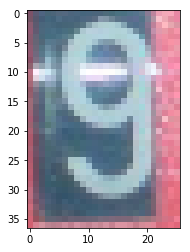

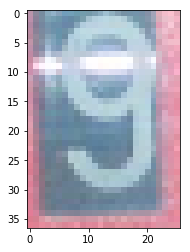

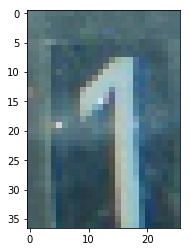

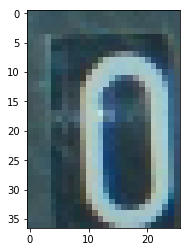

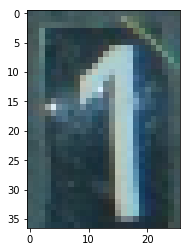

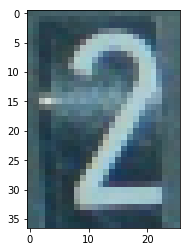

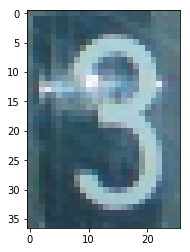

In [8]:
for ind in range(7):
    plt.imshow(numbers[600+ind])
    plt.show()

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(numbers, digits, test_size=0.10)
numb_train = X_train.shape[0]
numb_test= X_test.shape[0]

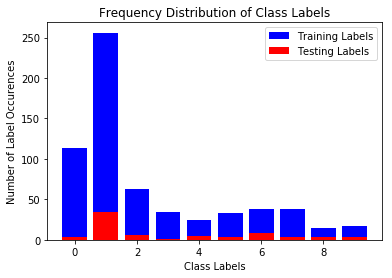

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]), array([113, 256,  63,  34,  24,  33,  38,  38,  14,  17], dtype=int64))


In [10]:
num_classes=10
printFrequencyDistribution(y_train, y_test,num_classes)  

In [11]:
print (valueDistribution(y_train)[1])

[113 256  63  34  24  33  38  38  14  17]


In [12]:
X_train.shape

(630, 37, 26, 3)

In [13]:
print (y_train[:10])
print (y_train.dtype)

[0. 5. 1. 1. 1. 7. 1. 2. 0. 1.]
float64


In [14]:
# Select an equal number of samples from both x_values and y_values
def valueSelection(x_values,y_values,cut):
    selector = np.ones((len(y_values)), dtype=bool)
    selector[0:10]
    for ind in range(0,11):
        sel =y_values[:]==ind
        sel[np.argwhere(sel)[:cut]]=0
        selector[sel] = 0
    y_selection=y_values[selector]
    x_selection=x_values[selector,:,:,:]
    return (x_selection,y_selection)

In [15]:
# getting an equal number of values for each class
#train_min = np.min(valueDistribution(y_train)[1])
#test_min = np.min(valueDistribution(y_test)[1])
train_min = valueDistribution(y_train)[1][6]
# reduced number of classes
#train_min = 2000
#test_min = 1500
x_train_small,y_train_small=valueSelection(X_train,y_train,train_min)
#x_test_small,y_test_small=valueSelection(x_test_cut,y_test,test_min)
numb_train=len(x_train_small)
print (train_min)
print (x_train_small.shape)
print (y_train_small.shape)

38
(312, 37, 26, 3)
(312,)


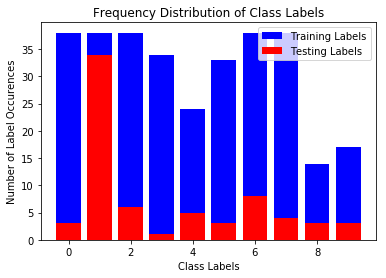

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]), array([38, 38, 38, 34, 24, 33, 38, 38, 14, 17], dtype=int64))


In [16]:

printFrequencyDistribution(y_train_small,y_test,num_classes) 

In [17]:
train_data = x_train_small.astype('float32') / 256
test_data = X_test.astype('float32') / 256

# reshaping np array so that we can access data in CNN friendly format i.e. [i,:,:,:] from [:,:,:,i]
#train_data = np.transpose(train_data, (3, 0, 1, 2))
#test_data = np.transpose(test_data,(3, 0, 1, 2))

#changing class labels range 1-10 to 0-9
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0

# processing labels in CNN friendly format i.e. 1-hot-encoding

train_labels = to_categorical(y_train_small[:])
test_labels = to_categorical(y_test[:])
#train_labels = (np.arange(num_classes) == train_labels[:, None]).astype(np.float32)
#test_labels = (np.arange(num_classes) == test_labels[:, None]).astype(np.float32)

print ('Train data:', train_data.shape,', Train labels:', train_labels.shape)
print ('Test data:', test_data.shape,', Test labels:', test_labels.shape)

Train data: (312, 37, 26, 3) , Train labels: (312, 10)
Test data: (70, 37, 26, 3) , Test labels: (70, 10)


In [27]:
import cv2

reshaped_train_data=[]
reshaped_test_data=[]
for ind in range(numb_train):
    img=cv2.resize(train_data[ind], dsize=(22, 32), interpolation=cv2.INTER_LINEAR)
    reshaped_train_data.append(img)
for ind in range(numb_test):
    img=cv2.resize(test_data[ind], dsize=(22, 32), interpolation=cv2.INTER_LINEAR)
    reshaped_test_data.append(img)
    
reshaped_train_data = np.asarray(reshaped_train_data)
reshaped_test_data = np.asarray(reshaped_test_data)

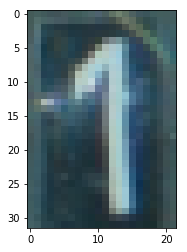

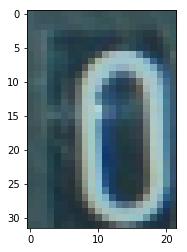

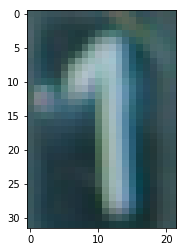

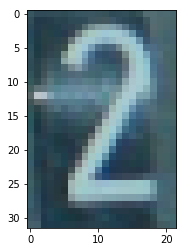

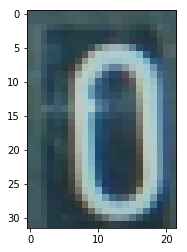

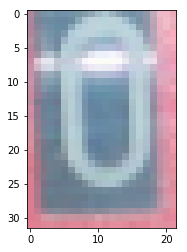

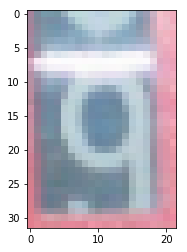

In [38]:
for ind in range(7):
    plt.imshow(reshaped_train_data[10+ind])
    plt.show()

In [18]:
# Load model if required
model = pickle.load( open( "modelCNN.pck", "rb" ) )

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 20, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 30, 20, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 10, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4800)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                307264    
_________________________________________________________________
activation_8 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
__________

In [20]:
model_weights=model.get_weights()

In [167]:
my_model = Model(weights=model_weights, include_top=False, input_shape=(37, 26, 3))

TypeError: _init_subclassed_network() got an unexpected keyword argument 'weights'

In [30]:
import timeit

start = timeit.default_timer()

epochs=50
batch_size=44
result= model.fit(reshaped_train_data, train_labels, batch_size=batch_size,
          epochs=epochs, validation_data=(reshaped_test_data, test_labels))
stop = timeit.default_timer()

print('Time: ', stop - start)  

Train on 312 samples, validate on 70 samples
Epoch 1/50
312/312 [==============================] - 0s 502us/step - loss: 0.5783 - acc: 0.7788 - val_loss: 0.2032 - val_acc: 0.9429
Epoch 2/50
312/312 [==============================] - 0s 464us/step - loss: 0.5550 - acc: 0.7692 - val_loss: 0.1854 - val_acc: 0.9286
Epoch 3/50
312/312 [==============================] - 0s 469us/step - loss: 0.5163 - acc: 0.7981 - val_loss: 0.1715 - val_acc: 0.9571
Epoch 4/50
312/312 [==============================] - 0s 491us/step - loss: 0.5124 - acc: 0.7821 - val_loss: 0.1682 - val_acc: 0.9571
Epoch 5/50
312/312 [==============================] - 0s 485us/step - loss: 0.4326 - acc: 0.8397 - val_loss: 0.1542 - val_acc: 0.9286
Epoch 6/50
312/312 [==============================] - 0s 483us/step - loss: 0.4899 - acc: 0.8045 - val_loss: 0.1441 - val_acc: 0.9429
Epoch 7/50
312/312 [==============================] - 0s 491us/step - loss: 0.4489 - acc: 0.8077 - val_loss: 0.1451 - val_acc: 0.9714
Epoch 8/50
312/31

Text(0.5,1,'Accuracy Curves')

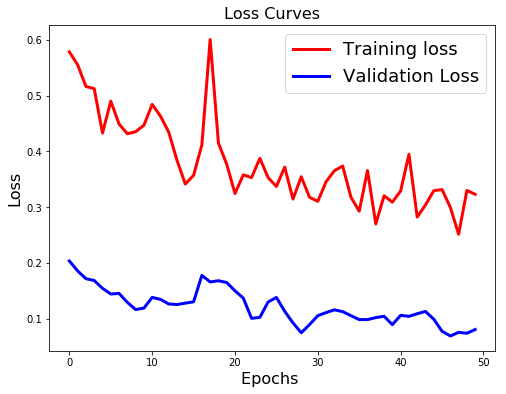

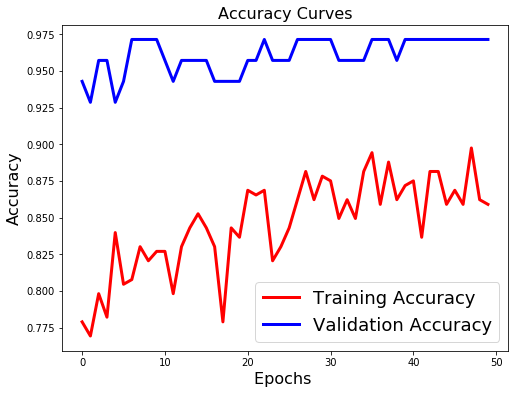

In [31]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(result.history['loss'],'r',linewidth=3.0)
plt.plot(result.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(result.history['acc'],'r',linewidth=3.0)
plt.plot(result.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [37]:
print (test_labels.shape)
#test_labels_small =y_test_small[:,0]

out2 = model.predict(reshaped_train_data[0:20])
#y =y_test_small.reshape([-1])
print ('Correct Values:',np.array(y_train[0:20],int))
print ('Prediction:    ',np.argmax(out2, axis=1))
print (out2[:20])


(70, 10)
Correct Values: [0 5 1 1 1 7 1 2 0 1 1 0 1 2 0 0 9 1 7 0]
Prediction:     [0 5 1 1 1 7 1 2 0 1 1 0 1 2 0 0 5 1 7 0]
[[9.99999762e-01 2.40122375e-07 6.93673635e-24 3.02242300e-17
  4.91040987e-16 7.51365558e-25 8.07715873e-12 2.69035138e-18
  6.54301960e-11 1.17252902e-10]
 [2.60226078e-18 1.83249635e-20 6.08073625e-22 2.59072025e-04
  5.67028736e-16 9.99717057e-01 4.18102900e-06 1.61679198e-10
  7.58470647e-11 1.97189256e-05]
 [8.87469795e-08 9.99999881e-01 1.60349883e-13 6.59336604e-12
  2.52082657e-08 7.29477347e-18 4.84113084e-15 1.31383802e-08
  8.36102766e-14 2.57432540e-14]
 [4.71896344e-09 1.00000000e+00 1.14692000e-17 1.42796897e-14
  5.17859755e-09 2.01761569e-21 6.21724367e-17 3.75859552e-11
  9.81343044e-16 3.51635934e-17]
 [1.15131805e-07 9.99999881e-01 8.05203615e-17 5.72039866e-13
  5.91351466e-08 8.27974835e-20 3.32879332e-15 5.52190585e-11
  6.03436436e-14 4.15680741e-15]
 [5.31042387e-13 1.63160130e-05 1.68382641e-08 2.51489837e-05
  8.39496895e-15 7.60654117e

In [183]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K

# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3))
#base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(96, 96, 3), classes=10)


# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(128, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(10, activation='softmax')(x)

# this is the model we will train
model_inception = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model_inception.compile(optimizer='rmsprop', loss='categorical_crossentropy')



In [169]:
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 75, 75, 3)    0                                            
__________________________________________________________________________________________________
conv2d_283 (Conv2D)             (None, 37, 37, 32)   864         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_283 (BatchN (None, 37, 37, 32)   96          conv2d_283[0][0]                 
__________________________________________________________________________________________________
activation_283 (Activation)     (None, 37, 37, 32)   0           batch_normalization_283[0][0]    
__________________________________________________________________________________________________
conv2d_284

In [117]:
#reshaped_train_data=train_data.resize((469, 96, 96, 3), refcheck=False) 


#img = cv2.imread('your_image.jpg')
#res = cv2.resize(img, dsize=(54, 140), interpolation=cv2.INTER_CUBIC)

#test_data.resize((numb_test, 96, 96, 3), refcheck=False) 
#train_data.shape

error: OpenCV(3.4.1) C:\Miniconda3\conda-bld\opencv-suite_1533128839831\work\modules\imgproc\src\resize.cpp:4044: error: (-215) ssize.width > 0 && ssize.height > 0 in function cv::resize


In [190]:
# train the model on the new data for a few epochs
# model_inception.fit_generator((train_data,train_labels), steps_per_epoch=100, epochs=10)

import timeit

start = timeit.default_timer()

epochs=5
batch_size=44
result= model_inception.fit(reshaped_train_data, train_labels, batch_size=batch_size,
          epochs=epochs, validation_data=(reshaped_test_data, test_labels))
stop = timeit.default_timer()

print('Time: ', stop - start)  


Train on 332 samples, validate on 70 samples
Epoch 1/5
332/332 [==============================] - 12s 37ms/step - loss: 2.3246 - val_loss: 2.2505
Epoch 2/5
332/332 [==============================] - 5s 14ms/step - loss: 1.8356 - val_loss: 2.3270
Epoch 3/5
332/332 [==============================] - 4s 13ms/step - loss: 1.4644 - val_loss: 2.9588
Epoch 4/5
332/332 [==============================] - 5s 14ms/step - loss: 1.1831 - val_loss: 2.6394
Epoch 5/5
332/332 [==============================] - 4s 13ms/step - loss: 1.0623 - val_loss: 3.1346
Time:  30.442613512997923


In [191]:
# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from keras.optimizers import SGD
model_inception.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy',metrics=['accuracy'])



0 input_8
1 conv2d_471
2 batch_normalization_471
3 activation_471
4 conv2d_472
5 batch_normalization_472
6 activation_472
7 conv2d_473
8 batch_normalization_473
9 activation_473
10 max_pooling2d_21
11 conv2d_474
12 batch_normalization_474
13 activation_474
14 conv2d_475
15 batch_normalization_475
16 activation_475
17 max_pooling2d_22
18 conv2d_479
19 batch_normalization_479
20 activation_479
21 conv2d_477
22 conv2d_480
23 batch_normalization_477
24 batch_normalization_480
25 activation_477
26 activation_480
27 average_pooling2d_46
28 conv2d_476
29 conv2d_478
30 conv2d_481
31 conv2d_482
32 batch_normalization_476
33 batch_normalization_478
34 batch_normalization_481
35 batch_normalization_482
36 activation_476
37 activation_478
38 activation_481
39 activation_482
40 mixed0
41 conv2d_486
42 batch_normalization_486
43 activation_486
44 conv2d_484
45 conv2d_487
46 batch_normalization_484
47 batch_normalization_487
48 activation_484
49 activation_487
50 average_pooling2d_47
51 conv2d_483
52

In [196]:
# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
#model_inception.fit_generator(...)

start = timeit.default_timer()

epochs=10
batch_size=44
result= model_inception.fit(reshaped_train_data, train_labels, batch_size=batch_size,
          epochs=epochs, validation_data=(reshaped_test_data, test_labels))
stop = timeit.default_timer()

print('Time: ', stop - start)  



Train on 332 samples, validate on 70 samples
Epoch 1/10
332/332 [==============================] - 5s 14ms/step - loss: 0.8468 - acc: 0.8313 - val_loss: 2.6816 - val_acc: 0.2000
Epoch 2/10
332/332 [==============================] - 5s 14ms/step - loss: 0.8555 - acc: 0.8524 - val_loss: 2.6834 - val_acc: 0.2000
Epoch 3/10
332/332 [==============================] - 5s 15ms/step - loss: 0.8224 - acc: 0.8584 - val_loss: 2.6828 - val_acc: 0.2000
Epoch 4/10
332/332 [==============================] - 5s 14ms/step - loss: 0.8208 - acc: 0.8042 - val_loss: 2.6821 - val_acc: 0.1857
Epoch 5/10
332/332 [==============================] - 5s 14ms/step - loss: 0.8098 - acc: 0.8404 - val_loss: 2.6792 - val_acc: 0.1857
Epoch 6/10
332/332 [==============================] - 5s 15ms/step - loss: 0.8225 - acc: 0.8313 - val_loss: 2.6766 - val_acc: 0.1857
Epoch 7/10
332/332 [==============================] - 5s 14ms/step - loss: 0.7975 - acc: 0.8494 - val_loss: 2.6758 - val_acc: 0.1857
Epoch 8/10
332/332 [====

In [74]:
print (result)

Text(0.5,1,'Accuracy Curves')

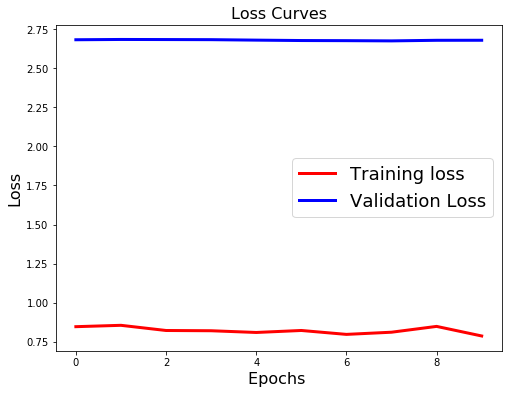

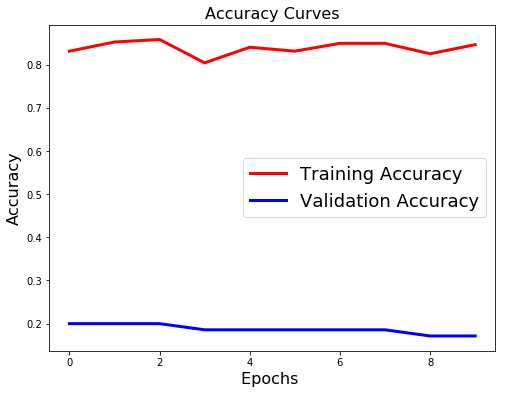

In [197]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(result.history['loss'],'r',linewidth=3.0)
plt.plot(result.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(result.history['acc'],'r',linewidth=3.0)
plt.plot(result.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [176]:
score = model_inception.evaluate(reshaped_test_data, test_labels, verbose=1)
score
print('Test loss:', score[0])
print('Test accuracy:', score[1])

70/70 [==============================] - 1s 12ms/step
Test loss: 1.7261364425931658
Test accuracy: 0.37142857228006637


In [49]:
score[0]

IndexError: invalid index to scalar variable.

#Feature Creation

In [195]:
print (test_labels.shape)
#test_labels_small =y_test_small[:,0]

out2 = model_inception.predict(reshaped_train_data[0:30])
#y =y_test_small.reshape([-1])
print ('Correct Values:',np.array(y_train[0:30],int))
print ('Prediction:    ',np.argmax(out2, axis=1))
print (out2[:15])

(70, 10)
Correct Values: [0 2 2 1 7 1 1 1 7 1 7 1 4 6 9 1 0 6 1 1 4 0 4 1 9 0 0 0 4 1]
Prediction:     [4 6 7 4 6 4 6 9 7 1 7 6 3 6 6 6 6 6 3 5 2 6 7 6 6 0 6 4 2 9]
[[2.10517436e-01 2.17484180e-02 4.93988134e-02 9.98247322e-03
  4.17839795e-01 3.19798477e-02 1.86133191e-01 1.72820520e-02
  6.52247982e-04 5.44656515e-02]
 [9.96815320e-03 1.04040779e-01 5.99504188e-02 5.79922237e-02
  5.37615009e-02 6.91529959e-02 4.18066502e-01 1.94390118e-01
  2.03046366e-03 3.06468513e-02]
 [1.29603436e-02 1.64119199e-01 9.51075926e-02 3.02820224e-02
  6.75427169e-02 4.30373438e-02 2.12872326e-01 3.16532403e-01
  1.27651263e-03 5.62695563e-02]
 [3.82759683e-02 1.29838735e-01 1.50369495e-01 1.67659540e-02
  4.38773245e-01 7.45644122e-02 6.28758296e-02 1.74809955e-02
  1.65616779e-03 6.93992004e-02]
 [8.17874819e-02 1.48575995e-02 1.49087891e-01 9.50562656e-02
  3.77480388e-02 1.16068169e-01 2.71254450e-01 3.59915718e-02
  1.12685598e-02 1.86879963e-01]
 [7.52661237e-03 8.60125422e-02 1.96877509e-01 2.4